# Part II -Communicate the data findings from loan data at Prosper
## by  Kevin Shyaka


## Investigation Overview

### Introduction
>This project aims to communicate findings revealed from the loan data at prosper using exploratory and explanatory data analysis.

## Dataset Overview

> The dataset comes from Prosper Marketplace Inc., a company that makes loans to people. It includes 113,937 loans, each with 81 variables such as loan amount, borrower rate (or interest rate), current loan status, borrower income, employment status , and many more.

In [1]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('../Data/prosperLoanData.csv')

In [3]:
#choose the columns of interest 
used_cols = ['ListingCreationDate','Term', 'LoanStatus', 'BorrowerAPR','BorrowerRate', 'ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)','BorrowerState','EmploymentStatus',
    'IsBorrowerHomeowner','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors']
df_used_cols = df[used_cols]

In [4]:
#changing the type of columns

df_used_cols['ProsperScore'] = df_used_cols['ProsperScore'].astype('category')
df_used_cols['TotalProsperLoans'] = df_used_cols['TotalProsperLoans'].fillna(0).astype('int64')
df_used_cols['ListingCreationDate'] = pd.to_datetime(df_used_cols['ListingCreationDate'])
df_used_cols['LoanOriginationDate'] = pd.to_datetime(df_used_cols['LoanOriginationDate'])


### Relationship between Prosper rating and Borrower rate
The plot shows that AA which is the highest rating received lowerst APR loan with 5.6% whilst HR as the lowest rating received the highest loan with 22.2%. This means as the prosper rating increase, the borrow rate decreases. 


In [5]:

def plot_(df:pd.DataFrame,col1,col2):
    df_mean = df.groupby(col1)[col2].mean()
    plt.figure(figsize=(10,8))
    plt.pie(df_mean, labels = df_mean.index, startangle = 90,
     autopct='%1.1f%%')
    plt.axis('square') 
    plt.title(f"{col1} vs {col2}",fontsize=15,fontweight="bold");


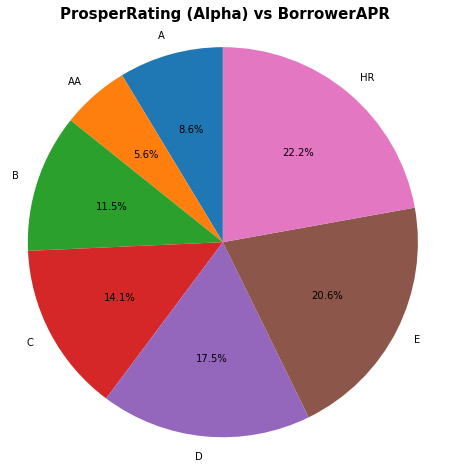

In [6]:
plot_(df_used_cols,'ProsperRating (Alpha)','BorrowerAPR')

### Borrower rate trends from 2005 to 2014 with respect to home ownership 

The graph shows the trend of borrow Rate from 2005 to 2014. intuitively, it can be seen that homeowners have a slightly lower rate that non-homeowners. 2011 is the year with high borrowed rate whilst 2005 is year with lowest borrowed rate with only people without home.

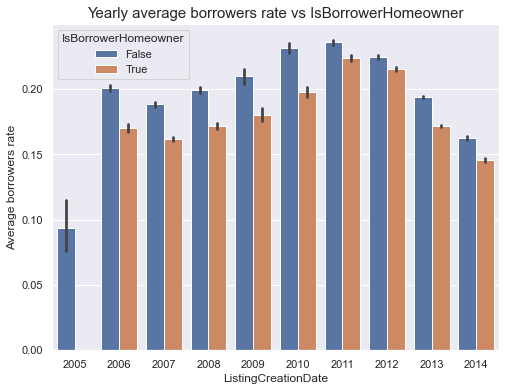

In [7]:
sb.set()
plt.figure(figsize=[8, 6]);
sb.barplot(data = df_used_cols, x = df_used_cols['ListingCreationDate'].apply(lambda x: x.year),
            y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.ylabel('Average borrowers rate');
plt.title('Yearly average borrowers rate vs IsBorrowerHomeowner',fontsize=15);
plt.show()

### Loan status in accordance to Employment status and Home ownership 

As shown on the graph, people with home and employed are the one with high current loans whilst category with other and no homer are the most to complete the loan followed by full-time with home.

In [8]:
df_used_cols_loan_status = df_used_cols[df_used_cols['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])]


In [9]:
def countplot(x, hue,**kwargs):
    data=kwargs.pop("data")
    order=np.unique(data['LoanStatus'].values)
    sb.countplot(x, hue=hue, data=data,order=order,**kwargs)

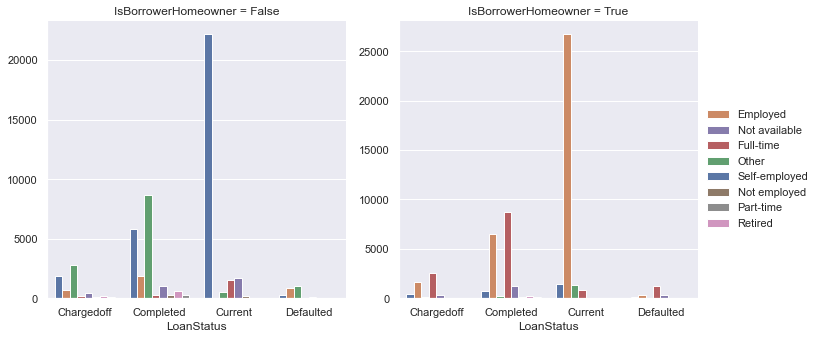

In [10]:

g = sb.FacetGrid(df_used_cols_loan_status, col='IsBorrowerHomeowner',  size=5, height=3, aspect=1, sharex=False, sharey=False)
g.map_dataframe(countplot, 'LoanStatus',hue='EmploymentStatus', alpha=.99,
                palette=sb.color_palette())
g.fig.subplots_adjust(top=0.9)
g.add_legend();

# Relationship between Loan status and Prosper rating

The graph depicts that current status outnumbered other categories. Secondly, we can see that in current category, C category is the one with highest current loans. Regarding those who completed their loan, we can see that D has the highest counts, which means people in that category are the most to complete the loan borrowed. 

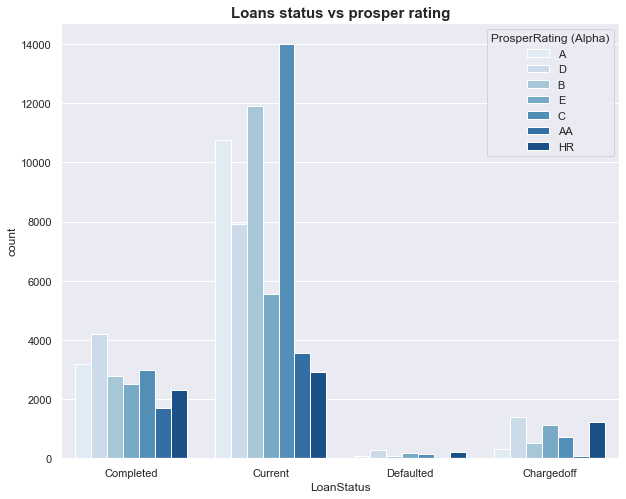

In [11]:
plt.figure(figsize=(10,8))
df_used_cols_loan_status = df_used_cols[df_used_cols['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])]
sb.countplot(data = df_used_cols_loan_status, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.title('Loans status vs prosper rating',fontsize=15,fontweight="bold");

In [ ]:
!jupyter nbconvert Part_II_explanatory_data_analysis.ipynb --to slides --post serve --no-input --no-prompt